# ⚽ MATCH WIN PREDICTION BRI LIGA 1 SEASON 2024/2025 ⚽

- Model: XGBoost 

In [147]:
# !pip install xgboost

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import defaultdict, deque


from sklearn.model_selection import train_test_split, TimeSeriesSplit
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, classification_report, brier_score_loss, confusion_matrix

# Read data

In [149]:
df1 = pd.read_csv(
    "/kaggle/input/midblock/siapTrain_v4_with cluster"
)

df1.tail()

,Unnamed: 0,match_id,avg_rating_home,weighted_rating_home,xG_from_players_home,goal_contrib_home,avg_rating_away,weighted_rating_away,xG_from_players_away,goal_contrib_away,...,elo_diff,point_last5_home,point_last5_away,leaguePoint_home,leaguePoint_away,pi_rating_home,pi_rating_away,home_cluster,away_cluster,winner
243,243,12652787,4.643478,6.682613,0.47,2.0,4.791304,6.941587,0.96,4.0,...,0.0,0,0,0,0,0.0,0.0,3,0,1
244,244,12652781,4.900000,7.181268,2.06,4.0,4.522727,6.611090,0.62,0.0,...,0.0,0,0,0,0,0.0,0.0,3,1,-1
245,245,12652782,4.682609,6.735138,1.49,1.0,4.630435,6.685841,2.33,1.0,...,0.0,0,0,0,0,0.0,0.0,3,1,0
246,246,12652783,4.960870,7.270937,2.22,5.0,4.586957,6.592483,0.71,0.0,...,0.0,0,0,0,0,0.0,0.0,0,1,-1
247,247,12652779,4.947826,7.252119,1.49,7.0,4.326087,6.619903,1.10,2.0,...,0.0,0,0,0,0,0.0,0.0,1,0,-1


In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            248 non-null    int64  
 1   match_id              248 non-null    int64  
 2   avg_rating_home       243 non-null    float64
 3   weighted_rating_home  243 non-null    float64
 4   xG_from_players_home  243 non-null    float64
 5   goal_contrib_home     243 non-null    float64
 6   avg_rating_away       243 non-null    float64
 7   weighted_rating_away  243 non-null    float64
 8   xG_from_players_away  243 non-null    float64
 9   goal_contrib_away     243 non-null    float64
 10  match_date            248 non-null    object 
 11  team_home_id          248 non-null    int64  
 12  homeTeam_name         248 non-null    object 
 13  team_away_id          248 non-null    int64  
 14  awayTeam_name         248 non-null    object 
 15  home_goals            2

In [151]:
df2 = pd.read_csv(
    "/kaggle/input/midblock/siapTrain_v2.csv"
)

df2.tail()

,Unnamed: 0,match_id,match_date,homeTeam_name,awayTeam_name,result,pi_rating_home,pi_rating_away,possession_home_last3_mean,possession_away_last3_mean,...,passes_home_last3_mean,passes_away_last3_mean,dribblesPct_home_last3_mean,dribblesPct_away_last3_mean,corners_home_last3_mean,corners_away_last3_mean,avg_rating_home_last3_mean,avg_rating_away_last3_mean,weighted_rating_home_last3_mean,weighted_rating_away_last3_mean
243,242,12654003,2025-04-11,PSIS Semarang,Persik Kediri,D,-0.349868,-0.158247,56.000000,57.000000,...,420.666667,364.000000,17.000000,19.666667,5.000000,4.666667,4.660870,5.099697,6.904568,6.877734
244,244,12653996,2025-04-11,Borneo FC Samarinda,Persib Bandung,D,0.077108,0.600889,57.333333,52.000000,...,383.000000,355.333333,11.666667,17.666667,5.666667,5.333333,4.479513,4.895527,7.055461,6.839163
245,246,12653997,2025-04-12,Persija Jakarta,Persebaya Surabaya,D,0.040962,0.092979,49.666667,39.666667,...,349.666667,276.333333,12.333333,11.666667,5.666667,4.333333,4.857431,4.630317,6.681057,6.758452
246,245,12654007,2025-04-12,Persis Solo,Malut United FC,A,-0.195487,0.340124,59.000000,43.666667,...,394.000000,292.666667,18.000000,13.666667,7.333333,3.000000,4.555072,4.734783,7.050938,6.830432
247,247,12654006,2025-04-13,Persita Tangerang,PS Barito Putera,H,-0.195651,-0.102359,45.000000,47.333333,...,301.000000,319.000000,14.333333,15.666667,8.000000,1.666667,4.592754,4.579710,6.837914,6.730271


In [152]:
df1.columns

Index(['Unnamed: 0', 'match_id', 'avg_rating_home', 'weighted_rating_home',
       'xG_from_players_home', 'goal_contrib_home', 'avg_rating_away',
       'weighted_rating_away', 'xG_from_players_away', 'goal_contrib_away',
       'match_date', 'team_home_id', 'homeTeam_name', 'team_away_id',
       'awayTeam_name', 'home_goals', 'away_goals', 'possession_home',
       'possession_away', 'passes_home', 'passes_away', 'accuratePasses_home',
       'accuratePasses_away', 'dribblesPct_home', 'dribblesPct_away',
       'duelWonPct_home', 'duelWonPct_away', 'interceptions_home',
       'interceptions_away', 'blocks_home', 'blocks_away', 'clearances_home',
       'clearances_away', 'corners_home', 'corners_away', 'fouls_home',
       'fouls_away', 'offsides_home', 'offsides_away', 'xG_home', 'xG_away',
       'result', 'elo_home', 'elo_away', 'elo_diff', 'point_last5_home',
       'point_last5_away', 'leaguePoint_home', 'leaguePoint_away',
       'pi_rating_home', 'pi_rating_away', 'home_clus

In [153]:
df2.columns

Index(['Unnamed: 0', 'match_id', 'match_date', 'homeTeam_name',
       'awayTeam_name', 'result', 'pi_rating_home', 'pi_rating_away',
       'possession_home_last3_mean', 'possession_away_last3_mean',
       'xG_home_last3_mean', 'xG_away_last3_mean',
       'goal_contrib_home_last3_mean', 'goal_contrib_away_last3_mean',
       'interceptions_home_last3_mean', 'interceptions_away_last3_mean',
       'passes_home_last3_mean', 'passes_away_last3_mean',
       'dribblesPct_home_last3_mean', 'dribblesPct_away_last3_mean',
       'corners_home_last3_mean', 'corners_away_last3_mean',
       'avg_rating_home_last3_mean', 'avg_rating_away_last3_mean',
       'weighted_rating_home_last3_mean', 'weighted_rating_away_last3_mean'],
      dtype='object')

In [154]:
# # 1. Tentukan kolom yang tidak ingin digabung (karena sudah ada di df1)
# columns_to_exclude = df2.columns.intersection(df1.columns)

# # 2. Drop kolom duplikat dari df2, kecuali kolom kunci penggabungan
# df2_unique = df2.drop(columns=columns_to_exclude.difference(['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name']))

# # 3. Merge berdasarkan kolom kunci
# df = df1.merge(df2_unique, on=['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name'], how='left')

# df

In [155]:
df = df1

In [156]:
# df = df2

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            248 non-null    int64  
 1   match_id              248 non-null    int64  
 2   avg_rating_home       243 non-null    float64
 3   weighted_rating_home  243 non-null    float64
 4   xG_from_players_home  243 non-null    float64
 5   goal_contrib_home     243 non-null    float64
 6   avg_rating_away       243 non-null    float64
 7   weighted_rating_away  243 non-null    float64
 8   xG_from_players_away  243 non-null    float64
 9   goal_contrib_away     243 non-null    float64
 10  match_date            248 non-null    object 
 11  team_home_id          248 non-null    int64  
 12  homeTeam_name         248 non-null    object 
 13  team_away_id          248 non-null    int64  
 14  awayTeam_name         248 non-null    object 
 15  home_goals            2

# EDA

In [158]:
# # Hitung korelasi (hanya kolom numerik)
# corr = df.corr(numeric_only=True)

# # Plot heatmap-nya
# plt.figure(figsize=(20, 14))  # Bisa disesuaikan ukurannya
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# plt.title("Korelasi antar Kolom Numerik")
# plt.show()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            248 non-null    int64  
 1   match_id              248 non-null    int64  
 2   avg_rating_home       243 non-null    float64
 3   weighted_rating_home  243 non-null    float64
 4   xG_from_players_home  243 non-null    float64
 5   goal_contrib_home     243 non-null    float64
 6   avg_rating_away       243 non-null    float64
 7   weighted_rating_away  243 non-null    float64
 8   xG_from_players_away  243 non-null    float64
 9   goal_contrib_away     243 non-null    float64
 10  match_date            248 non-null    object 
 11  team_home_id          248 non-null    int64  
 12  homeTeam_name         248 non-null    object 
 13  team_away_id          248 non-null    int64  
 14  awayTeam_name         248 non-null    object 
 15  home_goals            2

In [160]:
print(df['result'].value_counts())

result
H    104
A     75
D     69
Name: count, dtype: int64


In [161]:
df['match_date'] = pd.to_datetime(df['match_date'])  # Konversi ke datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            248 non-null    int64         
 1   match_id              248 non-null    int64         
 2   avg_rating_home       243 non-null    float64       
 3   weighted_rating_home  243 non-null    float64       
 4   xG_from_players_home  243 non-null    float64       
 5   goal_contrib_home     243 non-null    float64       
 6   avg_rating_away       243 non-null    float64       
 7   weighted_rating_away  243 non-null    float64       
 8   xG_from_players_away  243 non-null    float64       
 9   goal_contrib_away     243 non-null    float64       
 10  match_date            248 non-null    datetime64[ns]
 11  team_home_id          248 non-null    int64         
 12  homeTeam_name         248 non-null    object        
 13  team_away_id        

In [162]:
df.shape

(248, 54)

# Feature engineering

ada beberapa ide tambahan fitur:
- bikin kolom baru untuk melihat point yang didapat tim dalam last 5 match
- 

In [163]:
# # Tambahkan kolom poin hasil pertandingan
# df['home_points'] = df['result'].map({'H': 3, 'D': 1, 'A': 0})
# df['away_points'] = df['result'].map({'A': 3, 'D': 1, 'H': 0})

In [164]:
# # Convert match_date ke datetime dan sort dari terlama ke terbaru
# df['match_date'] = pd.to_datetime(df['match_date'])
# df = df.sort_values('match_date').reset_index(drop=True)

# # Simpan histori skor tiap tim (max 5 pertandingan terakhir)
# history = defaultdict(lambda: deque(maxlen=5))

# # List buat simpan hasil
# point_last5_home = []
# point_last5_away = []

# # Fungsi convert hasil jadi poin
# def result_to_point(result, is_home):
#     if result == 'D':
#         return 1
#     elif result == 'H' and is_home:
#         return 3
#     elif result == 'A' and not is_home:
#         return 3
#     else:
#         return 0

# # Loop setiap pertandingan
# for _, row in df.iterrows():
#     home_id = row['team_home_id']
#     away_id = row['team_away_id']
#     result = row['result']

#     # Simpan jumlah total poin 5 match terakhir
#     point_last5_home.append(sum(history[home_id]))
#     point_last5_away.append(sum(history[away_id]))

#     # Update histori dengan hasil match ini
#     history[home_id].append(result_to_point(result, is_home=True))
#     history[away_id].append(result_to_point(result, is_home=False))

# # Tambahkan ke df
# df['point_last5_home'] = point_last5_home
# df['point_last5_away'] = point_last5_away

# # Balikin lagi ke urutan match_date DESCENDING (terbaru dulu)
# df = df.sort_values('match_date', ascending=False).reset_index(drop=True)


In [165]:
# df.isna().sum()

In [166]:
df = df.dropna()

In [167]:
df = df.drop_duplicates()

In [168]:
# df['xG_diff'] = df['xG_home'] - df['xG_away']
# df['poss_diff'] = df['possession_home'] - df['possession_away']
# df['duel_diff'] = df['duelWonPct_home'] - df['duelWonPct_away']

df['pi_diff'] = df['pi_rating_home'] - df['pi_rating_away']
df['last5point_diff'] = df['point_last5_home'] - df['point_last5_away']
df['point_diff'] = df['leaguePoint_home'] - df['leaguePoint_away']

In [169]:
df.head()

,Unnamed: 0,match_id,avg_rating_home,weighted_rating_home,xG_from_players_home,goal_contrib_home,avg_rating_away,weighted_rating_away,xG_from_players_away,goal_contrib_away,...,leaguePoint_home,leaguePoint_away,pi_rating_home,pi_rating_away,home_cluster,away_cluster,winner,pi_diff,last5point_diff,point_diff
0,0,12654006,4.234783,7.026037,1.07,4.0,4.500000,6.978912,2.43,1.0,...,36,29,-0.195651,-0.102359,3,1,-1,-0.093292,-6,7
1,1,12653997,4.666667,7.039712,1.15,1.0,4.655000,6.715856,0.20,2.0,...,40,48,0.040962,0.092979,3,0,0,-0.052017,-9,-8
2,2,12654007,4.013043,6.611045,1.02,2.0,4.595652,7.125904,2.16,5.0,...,23,43,-0.195487,0.340124,1,1,1,-0.535611,-2,-20
3,3,12653996,4.713043,6.822974,0.45,2.0,5.321053,6.864961,1.79,3.0,...,41,57,0.077108,0.600889,2,1,0,-0.523781,1,-16
4,4,12654000,4.795455,7.068050,2.77,2.0,5.621053,6.771042,1.03,1.0,...,37,25,0.083611,-0.414688,0,1,-1,0.498299,5,12


# Split data

In [170]:
split_date = pd.Timestamp('2025-01-31') #sesuaikan aja sih
train = df['match_date'] < split_date
test  = df['match_date'] >= split_date

# Build model

In [171]:
df.columns

Index(['Unnamed: 0', 'match_id', 'avg_rating_home', 'weighted_rating_home',
       'xG_from_players_home', 'goal_contrib_home', 'avg_rating_away',
       'weighted_rating_away', 'xG_from_players_away', 'goal_contrib_away',
       'match_date', 'team_home_id', 'homeTeam_name', 'team_away_id',
       'awayTeam_name', 'home_goals', 'away_goals', 'possession_home',
       'possession_away', 'passes_home', 'passes_away', 'accuratePasses_home',
       'accuratePasses_away', 'dribblesPct_home', 'dribblesPct_away',
       'duelWonPct_home', 'duelWonPct_away', 'interceptions_home',
       'interceptions_away', 'blocks_home', 'blocks_away', 'clearances_home',
       'clearances_away', 'corners_home', 'corners_away', 'fouls_home',
       'fouls_away', 'offsides_home', 'offsides_away', 'xG_home', 'xG_away',
       'result', 'elo_home', 'elo_away', 'elo_diff', 'point_last5_home',
       'point_last5_away', 'leaguePoint_home', 'leaguePoint_away',
       'pi_rating_home', 'pi_rating_away', 'home_clus

In [172]:
# df1

# Fitur dan target
features = df[[
    'point_last5_away',
    'point_last5_home', 
    'home_cluster', 
    'away_cluster', 
    'pi_rating_home', 
    'pi_rating_away', 
    'pi_diff', 
    'point_diff'
    # 'last5point_diff'
]]
target = df['result']

In [173]:
# # df2

# # Fitur dan target
# features = df[[
#      'pi_rating_home', 'pi_rating_away',
#        'possession_home_last3_mean', 'possession_away_last3_mean',
#        'xG_home_last3_mean', 'xG_away_last3_mean',
#        'goal_contrib_home_last3_mean', 'goal_contrib_away_last3_mean',
#        'interceptions_home_last3_mean', 'interceptions_away_last3_mean',
#        'passes_home_last3_mean', 'passes_away_last3_mean',
#        'dribblesPct_home_last3_mean', 'dribblesPct_away_last3_mean',
#        'corners_home_last3_mean', 'corners_away_last3_mean',
#        'avg_rating_home_last3_mean', 'avg_rating_away_last3_mean',
#        'weighted_rating_home_last3_mean', 'weighted_rating_away_last3_mean'
# ]]
# target = df['result']


In [174]:
# ## df merge

# # Fitur dan target
# features = df[[
#        'possession_home_last3_mean', 'possession_away_last3_mean',
#        'xG_home_last3_mean', 'xG_away_last3_mean',
#        'goal_contrib_home_last3_mean', 'goal_contrib_away_last3_mean',
#        'interceptions_home_last3_mean', 'interceptions_away_last3_mean',
#        'passes_home_last3_mean', 'passes_away_last3_mean',
#        'dribblesPct_home_last3_mean', 'dribblesPct_away_last3_mean',
#        'corners_home_last3_mean', 'corners_away_last3_mean',
#        'avg_rating_home_last3_mean', 'avg_rating_away_last3_mean',
#        'weighted_rating_home_last3_mean', 'weighted_rating_away_last3_mean',
#         'point_last5_away',
#         'point_last5_home', 
#         'home_cluster', 
#         'away_cluster', 
#         'pi_rating_home', 
#         'pi_rating_away', 
#         'pi_diff', 
#         'point_diff'
# ]]
# target = df['result']


In [175]:
# # Fitur dan target
# features = df[[
#      'pi_rating_home', 'pi_rating_away',
# ]]
# target = df['result']


In [176]:
# df[[
#     'point_last5_away', 'point_last5_home', 'home_cluster', 'away_cluster', 'pi_rating_home', 'pi_rating_away'
# ]]

In [177]:
X = features
y = target

X_train, X_test = X[train], X[test]

In [178]:
y

0      H
1      D
2      A
3      D
4      H
      ..
243    A
244    H
245    D
246    H
247    H
Name: result, Length: 243, dtype: object

In [179]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_train = y_encoded[train]
y_test = y_encoded[test]


In [180]:
y_test

array([2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 1])

In [181]:
le.classes_ 

array(['A', 'D', 'H'], dtype=object)

## class weight
distribusi di data:
H    104
D     69
A     75

In [182]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight

# Buat sample weight berdasarkan label
weights = compute_sample_weight(class_weight={0: 1, 1: 1.5, 2: 1}, y=y_train)


In [183]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

param_grid = {
    'n_estimators': [90, 100, 110],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.001, 0.01],
    'subsample': [0.5, 0.6],
    'colsample_bytree': [0.4, 0.5, 0.6]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Training dengan sample_weight
grid_search.fit(X_train, y_train, sample_weight=weights)
# grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Accuracy):", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 110, 'subsample': 0.6}
Best Score (Accuracy): 0.4228571428571429


In [184]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [5, 10, 15],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.5, 0.8, 1.0],
#     'colsample_bytree': [0.5, 0.8, 1.0]
# }

# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring='f1_macro',  # bisa juga 'accuracy' atau lainnya
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (F1 Macro):", grid_search.best_score_)

In [185]:
model = grid_search.best_estimator_

In [186]:
# # Train XGBoost model
# model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# model.fit(X_train, y_train)

In [187]:
# Evaluasi model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.41      0.35        17
           1       0.33      0.12      0.18        24
           2       0.53      0.70      0.60        27

    accuracy                           0.43        68
   macro avg       0.39      0.41      0.38        68
weighted avg       0.40      0.43      0.39        68

Confusion Matrix:
[[ 7  2  8]
 [12  3  9]
 [ 4  4 19]]


### with custom threshold

In [188]:
# probs = model.predict_proba(X_test)


# def custom_predict(probs, draw_window=0.2): 
#     preds = []
#     for p in probs:
#         diff = abs(p[0] - p[2])  # selisih antara home win dan away win
#         if diff <= draw_window:
#             preds.append(1)  # predict draw
#         else:
#             preds.append(np.argmax([p[0], 0, p[2]]))  # predict win
#     return preds

# custom_preds = custom_predict(probs, draw_window=0.2)  # coba 20% window
# print(classification_report(y_test, custom_preds))

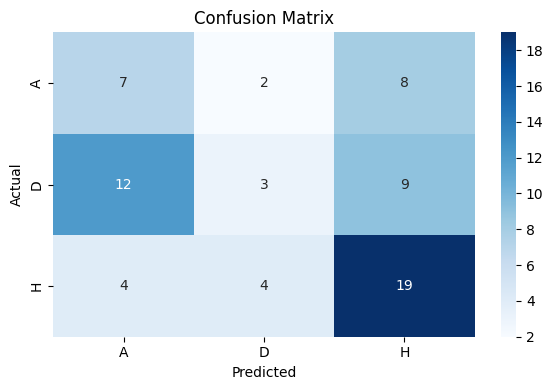

In [189]:
# Mapping dari angka ke label
label_mapping = {0: 'A', 1: 'D', 2: 'H'}

y_test_label = pd.Series(y_test).map(label_mapping)
y_pred_label = pd.Series(y_pred).map(label_mapping)

# Buat confusion matrix
cm = confusion_matrix(y_test_label, y_pred_label, labels=['A', 'D', 'H'])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A', 'D', 'H'],
            yticklabels=['A', 'D', 'H'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## save model

In [190]:
import joblib

In [191]:
# joblib.dump(model, '/kaggle/working/xgb_model_v3.joblib')
# joblib.dump(le, '/kaggle/working/label_encoder.joblib')


## load model

In [192]:
# # Load model dan encoder
# model = joblib.load('/kaggle/working/xgb_model_v1.joblib')
# le = joblib.load('/kaggle/working/label_encoder.joblib')

## Feature importances

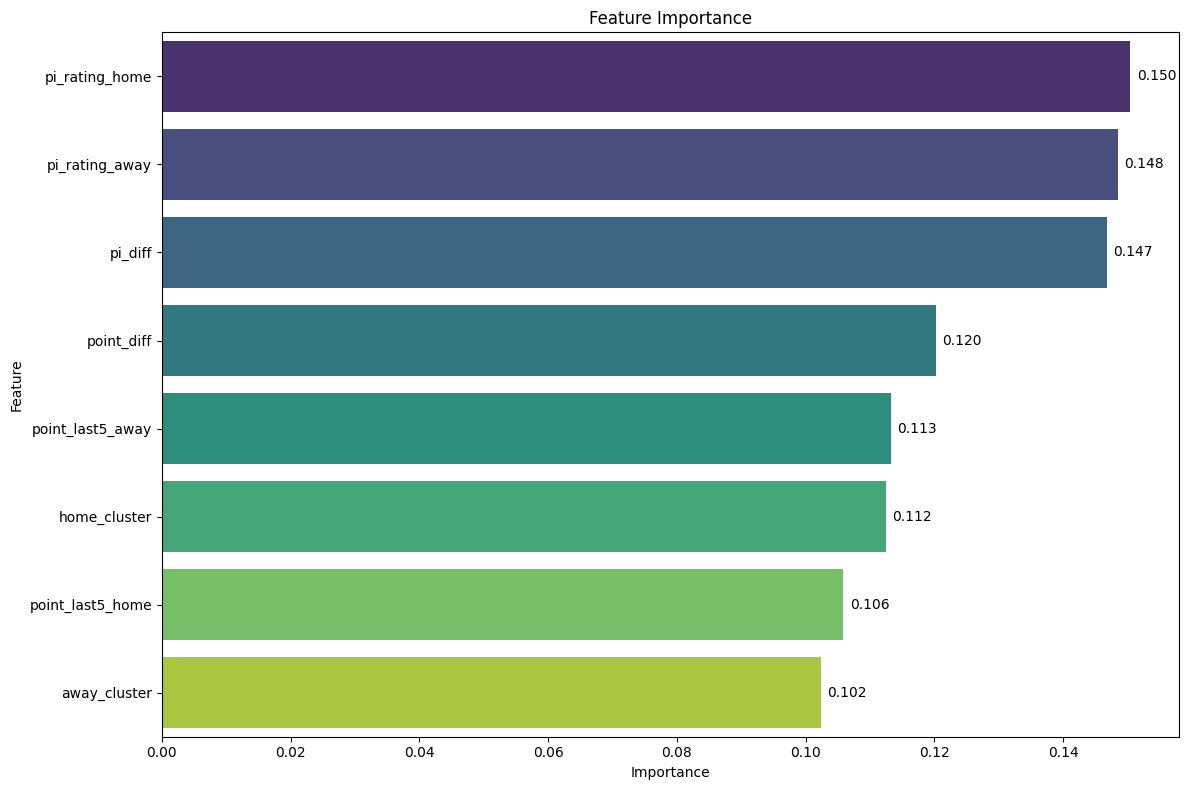

In [193]:
features = X_train.columns
feat_importance = model.feature_importances_

# Gabungkan feature dan importance jadi DataFrame
feat_df = pd.DataFrame({
    'feature': features,
    'importance': feat_importance
})

# Urutkan dari yang paling penting
feat_df = feat_df.sort_values(by='importance', ascending=False)

# Bikin plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_df, x='importance', y='feature', palette='viridis')

# Tambahin angka di ujung bar
for i, v in enumerate(feat_df['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [194]:
feat_df

,feature,importance
4,pi_rating_home,0.150478
5,pi_rating_away,0.148478
6,pi_diff,0.146855
7,point_diff,0.120216
0,point_last5_away,0.113282
2,home_cluster,0.112448
1,point_last5_home,0.105853
3,away_cluster,0.102391


# Predict

In [195]:
# Filter match yang pengin diprediksi

home_team = "persis"
away_team = "borneo"

### with custom threshold

In [196]:
# draw_threshold = 0.15  # threshold untuk deteksi draw

# # --- Filter pertandingan ---
# df_match = df[(df['homeTeam_name'].str.contains(home_team, case=False)) & 
#               (df['awayTeam_name'].str.contains(away_team, case=False))]

# if not df_match.empty:
#     # Tampilkan info pertandingan
#     print(df_match[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 'result']])

#     # Ambil index baris pertama hasil filter
#     match_index = df_match.index[0]

#     # Ambil fitur untuk prediksi
#     X_match = df.loc[match_index, features].values.reshape(1, -1)

#     # Prediksi probabilitas
#     pred_proba = model.predict_proba(X_match)[0]
#     proba_percent = pred_proba * 100

#     # Logika prediksi dengan custom threshold
#     away_proba = pred_proba[0]
#     draw_proba = pred_proba[1]
#     home_proba = pred_proba[2]

#     if abs(home_proba - away_proba) <= draw_threshold:
#         custom_pred = 1  # Draw
#     elif home_proba > away_proba:
#         custom_pred = 0  # Home win
#     else:
#         custom_pred = 2  # Away win

#     # Decode prediksi
#     decoded_custom_pred = le.inverse_transform([custom_pred])[0]
#     decoded_labels = le.inverse_transform(model.classes_)

#     # Tampilkan hasil prediksi
#     print(f"\n📊 Prediksi hasil (dengan threshold draw ±{draw_threshold*100:.0f}%): {decoded_custom_pred}")
#     print("Probabilitas per kelas:")
#     for label, prob in zip(decoded_labels, proba_percent):
#         print(f"  {label}: {prob:.2f}%")
# else:
#     print("Pertandingan tidak ditemukan.")


### normal

In [197]:
df_match = df[(df['homeTeam_name'].str.contains(home_team, case=False)) & 
              (df['awayTeam_name'].str.contains(away_team, case=False))]

if not df_match.empty:
    print(df_match[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 'result']])

    # Ambil index baris pertama hasil filter
    match_index = df_match.index[0]

    # Ambil fitur untuk prediksi
    X_match = df.loc[match_index, features].values.reshape(1, -1)

    # Prediksi probabilitas
    pred_result = model.predict(X_match)
    pred_proba = model.predict_proba(X_match)
    proba_percent = pred_proba[0] * 100

    # Decode prediksi
    decoded_pred = le.inverse_transform(pred_result)[0]
    decoded_labels = le.inverse_transform(model.classes_)

    print(f"\nPrediksi hasil: {decoded_pred}")
    print("Probabilitas per kelas:")
    for label, prob in zip(decoded_labels, proba_percent):
        print(f"  {label}: {prob:.2f}%")
else:
    print("Pertandingan tidak ditemukan.")


     match_id match_date homeTeam_name        awayTeam_name result
180  12650991 2024-10-19   Persis Solo  Borneo FC Samarinda      H

Prediksi hasil: A
Probabilitas per kelas:
  A: 37.47%
  D: 29.05%
  H: 33.48%


# Analysis

In [198]:
model.classes_

array([0, 1, 2])

In [199]:
# 3. PREDIKSI: Filter test set (contoh match setelah 31 Jan 2025)
df_test_matches = df[df['match_date'] >= pd.Timestamp('2025-01-31')].copy()

# 4. Ambil fitur dari data test
X_test = df_test_matches[features]  # features = list kolom fitur yang digunakan

# 5. Prediksi hasil dalam bentuk angka & probabilitas
pred_encoded = model.predict(X_test)
pred_probas = model.predict_proba(X_test)

# 6. Decode hasil prediksi ke label asli ('A', 'D', 'H')
pred_results = le.inverse_transform(pred_encoded)
df_test_matches.loc[:, 'predicted_result'] = pred_results

# 7. Tambahkan probabilitas ke DataFrame
for idx, label in enumerate(le.classes_):  # ['A', 'D', 'H']
    df_test_matches.loc[:, f'proba_{label}'] = pred_probas[:, idx] * 100

# 8. Tampilkan hasil akhir
df_test_matches = df_test_matches[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 
                             'predicted_result', 'proba_A', 'proba_D', 'proba_H']]

# Tampilkan hasil
df_test_matches.head()

,match_id,match_date,homeTeam_name,awayTeam_name,predicted_result,proba_A,proba_D,proba_H
0,12654006,2025-04-13,Persita Tangerang,PS Barito Putera,A,36.600788,29.521957,33.877254
1,12653997,2025-04-12,Persija Jakarta,Persebaya Surabaya,A,39.400288,31.763536,28.836176
2,12654007,2025-04-12,Persis Solo,Malut United FC,A,36.308357,30.358257,33.333385
3,12653996,2025-04-11,Borneo FC Samarinda,Persib Bandung,A,37.544918,35.210766,27.244312
4,12654000,2025-04-11,PSBS Biak,PSS Sleman,H,28.629446,26.093903,45.276649


In [200]:
# Merge hasil prediksi dengan df asli berdasarkan match_id
df_merged = df.merge(
    df_test_matches[['match_id', 'predicted_result', 'proba_A', 'proba_D', 'proba_H']],
    on='match_id',
    how='left'  # supaya semua data tetap ada, prediksi hanya untuk test set
)

# Tampilkan hasil untuk test set saja (setelah 2025-01-31)
df_merged_test = df_merged[df_merged['match_date'] >= pd.Timestamp('2025-01-31')]

In [201]:
# Lihat hasil
df_merged_test[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name',
                      'result', 'predicted_result', 'proba_A', 'proba_D', 'proba_H']]

,match_id,match_date,homeTeam_name,awayTeam_name,result,predicted_result,proba_A,proba_D,proba_H
0,12654006,2025-04-13,Persita Tangerang,PS Barito Putera,H,A,36.600788,29.521957,33.877254
1,12653997,2025-04-12,Persija Jakarta,Persebaya Surabaya,D,A,39.400288,31.763536,28.836176
2,12654007,2025-04-12,Persis Solo,Malut United FC,A,A,36.308357,30.358257,33.333385
3,12653996,2025-04-11,Borneo FC Samarinda,Persib Bandung,D,A,37.544918,35.210766,27.244312
4,12654000,2025-04-11,PSBS Biak,PSS Sleman,H,H,28.629446,26.093903,45.276649
...,...,...,...,...,...,...,...,...,...
63,12657437,2025-02-02,Borneo FC Samarinda,PSS Sleman,H,H,26.704975,31.228373,42.066650
64,12657436,2025-02-01,Persib Bandung,PSM Makassar,H,H,25.637403,31.132835,43.229763
65,12657438,2025-02-01,Madura United FC,Persis Solo,H,D,37.095547,37.319286,25.585165
66,12657439,2025-01-31,Persebaya Surabaya,Persita Tangerang,D,H,23.824242,30.926544,45.249210


### Save df result and predicted

In [223]:
# df_result = df_merged_test

# df_result = df_result[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 
#                  'result', 'predicted_result', 'proba_A', 'proba_D', 'proba_H']]

# df_result.to_csv('/kaggle/working/df_result and predicted_xgb_v6.csv')

## Error analysis

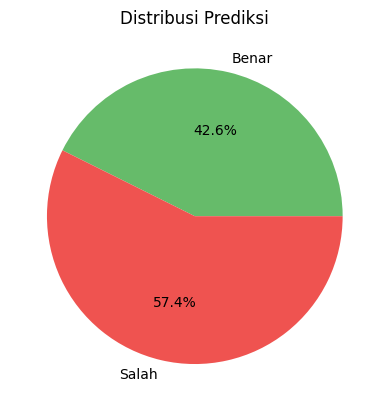

In [203]:
correct = (df_merged_test['result'] == df_merged_test['predicted_result']).sum()
incorrect = len(df_merged_test) - correct

plt.pie([correct, incorrect], labels=['Benar', 'Salah'], autopct='%1.1f%%', colors=['#66bb6a', '#ef5350'])
plt.title('Distribusi Prediksi')
plt.show()


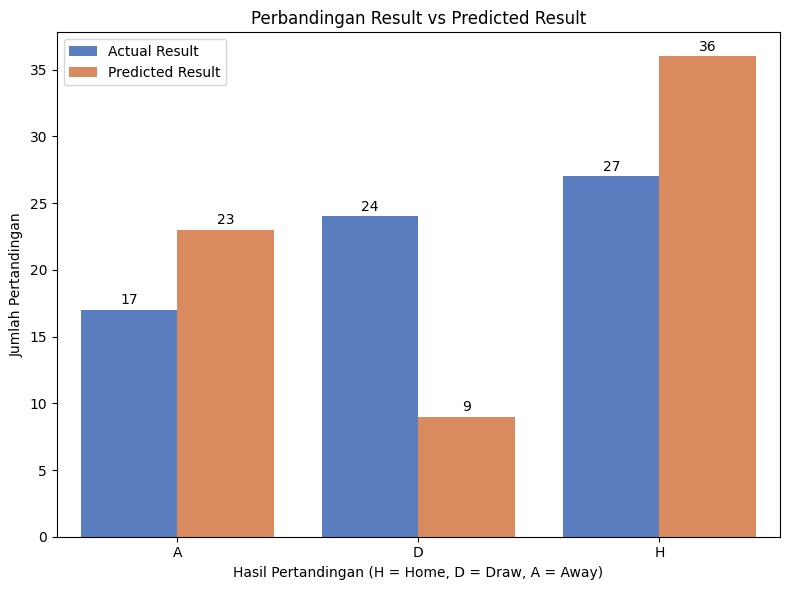

In [204]:
# Hitung frekuensi masing-masing kategori
result_counts = df_merged_test['result'].value_counts().sort_index()
predicted_counts = df_merged_test['predicted_result'].value_counts().sort_index()

# Gabung ke DataFrame
comparison_df = pd.DataFrame({
    'Actual Result': result_counts,
    'Predicted Result': predicted_counts
}).reset_index().melt(id_vars='index', var_name='Type', value_name='Count')
comparison_df.columns = ['Result', 'Type', 'Count']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=comparison_df, x='Result', y='Count', hue='Type', palette='muted')

# Tambahkan angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Perbandingan Result vs Predicted Result')
plt.xlabel('Hasil Pertandingan (H = Home, D = Draw, A = Away)')
plt.ylabel('Jumlah Pertandingan')
plt.legend(title='')
plt.tight_layout()
plt.show()

In [205]:
df_errors = df_merged_test[df_merged_test['result'] != df_merged_test['predicted_result']]

df_errors = df_errors[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 
                 'result', 'predicted_result', 'proba_A', 'proba_D', 'proba_H']]

df_errors


,match_id,match_date,homeTeam_name,awayTeam_name,result,predicted_result,proba_A,proba_D,proba_H
0,12654006,2025-04-13,Persita Tangerang,PS Barito Putera,H,A,36.600788,29.521957,33.877254
1,12653997,2025-04-12,Persija Jakarta,Persebaya Surabaya,D,A,39.400288,31.763536,28.836176
3,12653996,2025-04-11,Borneo FC Samarinda,Persib Bandung,D,A,37.544918,35.210766,27.244312
5,12654003,2025-04-11,PSIS Semarang,Persik Kediri,D,A,39.724575,32.290928,27.984503
7,13560026,2025-03-16,PSIS Semarang,Madura United FC,A,H,28.645700,25.327543,46.026756
9,12653985,2025-03-12,Persebaya Surabaya,PSIS Semarang,D,H,26.690754,26.775269,46.533981
11,12653991,2025-03-11,PSS Sleman,Persis Solo,A,D,31.154573,37.205505,31.639925
12,12653988,2025-03-11,Persik Kediri,PSM Makassar,D,A,45.164265,28.173864,26.661869
13,12653990,2025-03-11,Bali United FC,PSBS Biak,A,H,25.722099,31.947073,42.330830
15,12653994,2025-03-10,Dewa United FC,Borneo FC Samarinda,A,H,25.862799,33.954750,40.182453


In [206]:
df_errors.shape

(39, 9)

In [207]:
# Mapping untuk ambil probabilitas sesuai hasil
result_proba_map = {
    'A': df_errors['proba_A'],
    'D': df_errors['proba_D'],
    'H': df_errors['proba_H']
}

# Ambil probabilitas aktual berdasarkan hasil sebenarnya
df_errors['actual_proba'] = df_errors.apply(lambda row: row[f'proba_{row["result"]}'], axis=1)

# Ambil probabilitas prediksi berdasarkan prediksi model
df_errors['predicted_proba'] = df_errors.apply(lambda row: row[f'proba_{row["predicted_result"]}'], axis=1)

# Hitung selisih absolut
df_errors['proba_diff'] = (df_errors['predicted_proba'] - df_errors['actual_proba']).abs()

df_errors[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 
                 'result', 'predicted_result', 'proba_A', 'proba_D', 'proba_H', 'proba_diff']]



,match_id,match_date,homeTeam_name,awayTeam_name,result,predicted_result,proba_A,proba_D,proba_H,proba_diff
0,12654006,2025-04-13,Persita Tangerang,PS Barito Putera,H,A,36.600788,29.521957,33.877254,2.723534
1,12653997,2025-04-12,Persija Jakarta,Persebaya Surabaya,D,A,39.400288,31.763536,28.836176,7.636751
3,12653996,2025-04-11,Borneo FC Samarinda,Persib Bandung,D,A,37.544918,35.210766,27.244312,2.334152
5,12654003,2025-04-11,PSIS Semarang,Persik Kediri,D,A,39.724575,32.290928,27.984503,7.433647
7,13560026,2025-03-16,PSIS Semarang,Madura United FC,A,H,28.645700,25.327543,46.026756,17.381056
9,12653985,2025-03-12,Persebaya Surabaya,PSIS Semarang,D,H,26.690754,26.775269,46.533981,19.758713
11,12653991,2025-03-11,PSS Sleman,Persis Solo,A,D,31.154573,37.205505,31.639925,6.050932
12,12653988,2025-03-11,Persik Kediri,PSM Makassar,D,A,45.164265,28.173864,26.661869,16.990400
13,12653990,2025-03-11,Bali United FC,PSBS Biak,A,H,25.722099,31.947073,42.330830,16.608730
15,12653994,2025-03-10,Dewa United FC,Borneo FC Samarinda,A,H,25.862799,33.954750,40.182453,14.319654


In [208]:
# Rata-rata selisih
avg_diff = df_errors['proba_diff'].mean()

print(f"Rata-rata selisih probabilitas antara prediksi vs hasil aktual: {avg_diff:.4f}")

Rata-rata selisih probabilitas antara prediksi vs hasil aktual: 12.5060


In [209]:
modus_diff = df_errors['proba_diff'].mode()

if not modus_diff.empty:
    print(f"Modus selisih probabilitas antara prediksi vs hasil aktual: {modus_diff.iloc[0]:.4f}")
else:
    print("Tidak ada modus yang bisa dihitung.")


Modus selisih probabilitas antara prediksi vs hasil aktual: 0.1925


In [210]:
df_true = df_merged_test[df_merged_test['result'] == df_merged_test['predicted_result']]

df_true[['match_id', 'match_date', 'homeTeam_name', 'awayTeam_name', 
                 'result', 'predicted_result', 'proba_A', 'proba_D', 'proba_H']]


,match_id,match_date,homeTeam_name,awayTeam_name,result,predicted_result,proba_A,proba_D,proba_H
2,12654007,2025-04-12,Persis Solo,Malut United FC,A,A,36.308357,30.358257,33.333385
4,12654000,2025-04-11,PSBS Biak,PSS Sleman,H,H,28.629446,26.093903,45.276649
6,12653998,2025-04-10,Bali United FC,Dewa United FC,D,D,31.255371,39.752571,28.992058
8,12653992,2025-03-13,Arema FC,PS Barito Putera,H,H,29.556898,26.606131,43.836971
10,12657417,2025-03-12,Malut United FC,Persita Tangerang,H,H,23.634031,33.474133,42.891838
14,12653979,2025-03-10,Semen Padang FC,Persib Bandung,A,A,43.836414,34.970398,21.193193
21,12654057,2025-03-06,PSBS Biak,Borneo FC Samarinda,H,H,33.486973,27.465614,39.047417
22,12654063,2025-03-05,Dewa United FC,Semen Padang FC,H,H,22.051826,38.207119,39.741051
23,12654060,2025-03-05,Persib Bandung,Persik Kediri,H,H,28.306511,25.950840,45.742653
24,12657420,2025-03-04,Malut United FC,Arema FC,H,H,25.444666,35.513245,39.042091


In [211]:
df_true.shape

(29, 61)

### coba cek di salah satu klub

In [212]:
team = "psis"

df_merged_test[
    (df_merged_test['homeTeam_name'].str.contains(team, case=False)) |
    (df_merged_test['awayTeam_name'].str.contains(team, case=False))
][['match_id', 'homeTeam_name', 'awayTeam_name', 'result', 'predicted_result']]


,match_id,homeTeam_name,awayTeam_name,result,predicted_result
5,12654003,PSIS Semarang,Persik Kediri,D,A
7,13560026,PSIS Semarang,Madura United FC,A,H
9,12653985,Persebaya Surabaya,PSIS Semarang,D,H
33,12654050,Arema FC,PSIS Semarang,D,H
45,12654040,PSIS Semarang,PSM Makassar,D,A
52,12657425,PSIS Semarang,Persib Bandung,A,A
59,12657432,PSIS Semarang,Dewa United FC,A,A


# Tambahan

## Prediksi upcoming match 💀

In [213]:
df['homeTeam_name'].unique()

array(['Persita Tangerang', 'Persija Jakarta', 'Persis Solo',
       'Borneo FC Samarinda', 'PSBS Biak', 'PSIS Semarang',
       'Bali United FC', 'Arema FC', 'Persebaya Surabaya',
       'Malut United FC', 'PSS Sleman', 'Persik Kediri',
       'Semen Padang FC', 'Dewa United FC', 'PS Barito Putera',
       'PSM Makassar', 'Persib Bandung', 'Madura United FC'], dtype=object)

In [214]:
# 1. Pastikan match_date sudah datetime
df['match_date'] = pd.to_datetime(df['match_date'])

# 2. Fungsi untuk ambil baris last match sebuah tim sebelum tanggal tertentu
def get_last_match_row(df, team_name, as_of_date):
    # filter semua pertandingan tim ini (home atau away) sebelum as_of_date
    mask = (
        ((df['homeTeam_name'] == team_name) | (df['awayTeam_name'] == team_name)) &
        (df['match_date'] < as_of_date)
    )
    df_team = df.loc[mask].sort_values('match_date')
    if df_team.empty:
        raise ValueError(f"Tidak ada data historis untuk tim {team_name} sebelum {as_of_date}")
    return df_team.iloc[-1]

In [215]:
# 3. Tentukan tim dan tanggal “sekarang” untuk prediksi
home_team = "Borneo FC Samarinda"
away_team = "PSM Makassar"
as_of = pd.Timestamp.now()  # atau tanggal kompetisi mendatang

# 4. Ambil baris match terakhir masing-masing tim
last_home = get_last_match_row(df, home_team, as_of)
last_away = get_last_match_row(df, away_team, as_of)

In [216]:
last_home

Unnamed: 0                                3
match_id                           12653996
avg_rating_home                    4.713043
weighted_rating_home               6.822974
xG_from_players_home                   0.45
goal_contrib_home                       2.0
avg_rating_away                    5.321053
weighted_rating_away               6.864961
xG_from_players_away                   1.79
goal_contrib_away                       3.0
match_date              2025-04-11 00:00:00
team_home_id                         189945
homeTeam_name           Borneo FC Samarinda
team_away_id                          64289
awayTeam_name                Persib Bandung
home_goals                              2.0
away_goals                              2.0
possession_home                        62.0
possession_away                        38.0
passes_home                           467.0
passes_away                           247.0
accuratePasses_home                   402.0
accuratePasses_away             

In [221]:
# 5. Build dict feature → nilai sesuai urutan feature_cols kamu
feature_cols = features

In [218]:
# # Utility: ambil nilai feature khusus home/away dari baris terakhir
# def pull(feat_base, last_row, team_was_home):
#     """
#     feat_base: misal 'avg_rating'
#     team_was_home: True kalau tim bermain di kandang di last_row
#     """
#     col = f"{feat_base}_{'home' if team_was_home else 'away'}"
#     return last_row[col]

# # Siapkan vector X_match
# X_match = []

# # home-side features dari last_home
# home_was_home = (last_home['homeTeam_name'] == home_team)
# for feat in ['avg_rating', 'weighted_rating', 'xG_from_players', 'goal_contrib']:
#     X_match.append(pull(feat, last_home, home_was_home))

# # away-side features dari last_away
# away_was_home = (last_away['homeTeam_name'] == away_team)
# for feat in ['avg_rating', 'weighted_rating', 'xG_from_players', 'goal_contrib']:
#     # catat sebagai fitur _away
#     X_match.append(pull(feat, last_away, not away_was_home))  # not, karena kita mau kolom away

# # sisanya (possession, passes, …, xG)
# for base in ['possession', 'passes', 'accuratePasses', 'dribblesPct',
#              'duelWonPct', 'interceptions', 'blocks', 'clearances',
#              'corners', 'offsides', 'xG']:
#     # home
#     X_match.append(pull(base, last_home, home_was_home))
#     # away
#     X_match.append(pull(base, last_away, not away_was_home))

# # convert ke array 1×n
# X_match = np.array(X_match).reshape(1, -1)

# # Prediksi
# pred = model.predict(X_match)[0]
# proba = model.predict_proba(X_match)[0] * 100

# decoded_pred = le.inverse_transform([pred])[0]
# decoded_classes = le.inverse_transform(model.classes_)

# print(f"Prediksi {home_team} vs {away_team}: {decoded_pred}")
# for label, p in zip(decoded_classes, proba):
#     print(f"  {label}: {p:.2f}%")

# 🤙🤙🤙

Miftahur Rizki

In [222]:
# Utility: ambil nilai feature khusus home/away dari baris terakhir
def pull(feat_base, last_row, team_was_home):
    """
    feat_base: misal 'avg_rating'
    team_was_home: True kalau tim bermain di kandang di last_row
    """
    col = f"{feat_base}_{'home' if team_was_home else 'away'}"
    return last_row[col]

# Siapkan vector X_match
X_match = []

# home-side features dari last_home
home_was_home = (last_home['homeTeam_name'] == home_team)
for feat in ['avg_rating', 'weighted_rating', 'xG_from_players', 'goal_contrib']:
    X_match.append(pull(feat, last_home, home_was_home))

# away-side features dari last_away
away_was_home = (last_away['homeTeam_name'] == away_team)
for feat in ['avg_rating', 'weighted_rating', 'xG_from_players', 'goal_contrib']:
    # catat sebagai fitur _away
    X_match.append(pull(feat, last_away, not away_was_home))  # not, karena kita mau kolom away

# sisanya (possession, passes, …, xG)
for base in ['possession', 'passes', 'accuratePasses', 'dribblesPct',
             'duelWonPct', 'interceptions', 'blocks', 'clearances',
             'corners', 'offsides', 'xG']:
    # home
    X_match.append(pull(base, last_home, home_was_home))
    # away
    X_match.append(pull(base, last_away, not away_was_home))

# convert ke array 1×n
X_match = np.array(X_match).reshape(1, -1)

threshold = 60.0
selisih_min = 10.0  # dalam persen

pred_proba = model.predict_proba(X_match)[0] * 100
decoded_classes = le.inverse_transform(model.classes_)

# Buat dict untuk akses cepat
proba_dict = dict(zip(decoded_classes, pred_proba))

# Ambil nilai untuk H dan A
home_proba = proba_dict.get('H', 0)
away_proba = proba_dict.get('A', 0)
draw_proba = proba_dict.get('D', 0)

# Logika prediksi khusus dengan threshold dan selisih
if max(home_proba, away_proba) >= threshold:
    if abs(home_proba - away_proba) < selisih_min:
        final_pred = 'D'
    else:
        final_pred = 'H' if home_proba > away_proba else 'A'
else:
    final_pred = 'D'

print(f"Prediksi {home_team} vs {away_team}: {final_pred}")
for label in ['A', 'D', 'H']:  # urut sesuai di model
    print(f"  {label}: {proba_dict[label]:.2f}%")


ValueError: Feature shape mismatch, expected: 8, got 30